# **Ringkasan Data Pemasaran Bank**

# **Data Understanding**

### Collect Initial Data

📌 Deskripsi Dataset :

Dataset ini berisi data hasil kampanye pemasaran langsung (**direct marketing**) yang dilakukan oleh sebuah **bank di Portugal** periode Mei 2008 sampai November 2010. Dalam kampanye ini, pihak bank melakukan promosi melalui telepon kepada nasabah untuk menawarkan produk “**term deposit**” (semacam deposito berjangka).

Sumber : https://archive.ics.uci.edu/dataset/222/bank+marketing



In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/bank-full.csv", delimiter=";", header=0)
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Jumlah dataset terdiri dari 45.211 sampel dengan 17 kolom. Berikut penjelasan masing-masing kolom :
*   age (umur) : usia nasabah
*   job : pekerjaan nasabah
*   marital : status pernikahan nasabah
*   education : tingkat pendidikan nasabah
*   default : status kredit macet sebelumnya dari nasabah
*   balance : saldo rata-rata tahunan di Bank
*   housing :Menunjukkan apakah nasabah sedang memiliki pinjaman perumahan (housing loan)
*   loan : apakah nasabah memiliki pinjaman pribadi
*   contact : media kontak
*   day : Hari tanggal ke berapa bank menghubungi nasabah
*   month : Bulan ketika nasabah dihubungi
*   duration : durasi panggilan
*   campaign : Berisi berapa kali nasabah dihubungi selama kampanye saat ini
*   pdays : hari sejak terakhir dihubungi pada kampanye sebelumnya
*   previous : Berapa kali nasabah pernah dihubungi pada kampanye sebelumnya (sebelum kampanye telepon terakhir)
*   poutcome : hasil kampanye sebelumnya
*   y : Jawaban dari nasabah tentang apakah mereka berlangganan deposito (term deposit) atau tidak.

In [ ]:
print("Jumlah baris : ", data.shape[0])
print("jumlah kolom : ", data.shape[1])

Jumlah baris :  45211
jumlah kolom :  17


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Describe Data

In [ ]:
# Statistik untuk kolom numerik
num_static = data.describe().T
print("Statistik numerik : ")
display(num_static)


# Statistik untuk kolom kategorikal
cat_static = data.describe(include= ['object','category']).T
print("\nStatistik kategorikal : ")
display(cat_static)

Statistik numerik : 


,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0



Statistik kategorikal : 


,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


In [ ]:
# missing value

data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
# Distribusi kelas target
data['y'].value_counts()

,count
y,
no,39922
yes,5289


### Explore Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

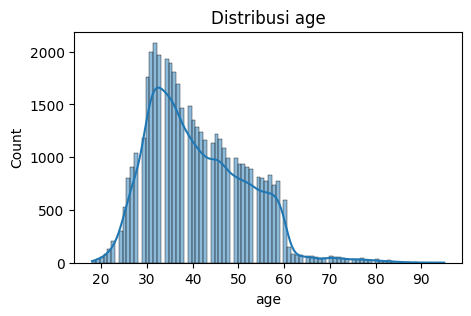

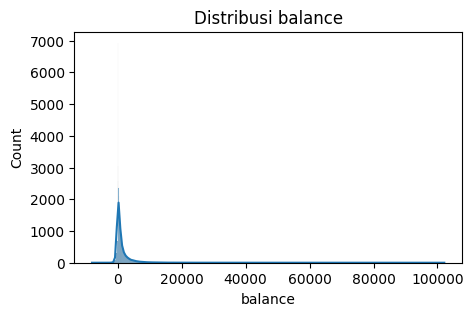

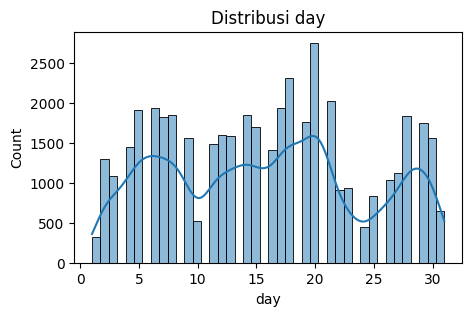

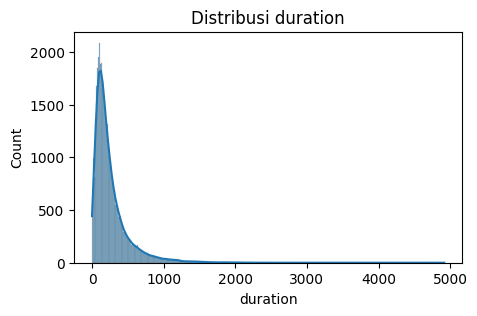

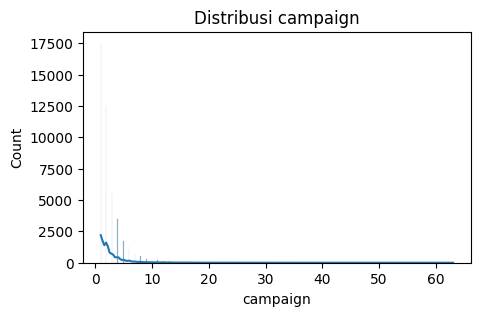

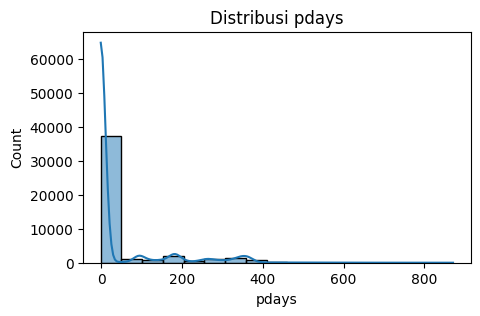

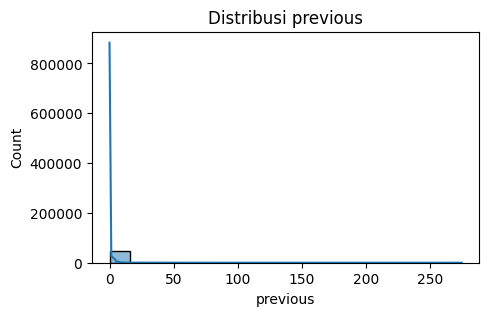

In [ ]:
# Pilih kolom numerik
numeric_cols = data.select_dtypes(include='number').columns

# Plot distribusi tiap kolom numerik
for col in numeric_cols:
    plt.figure(figsize=(5, 3))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()


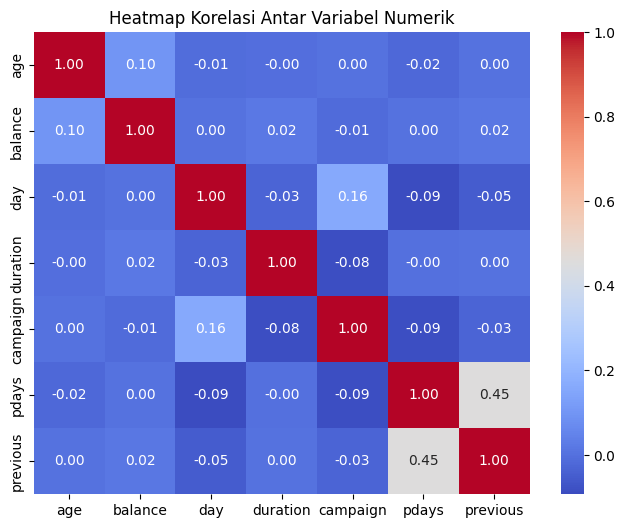

In [ ]:
# Hitung korelasi
corr = data.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()


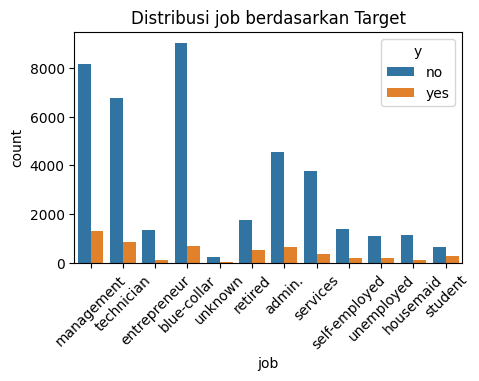

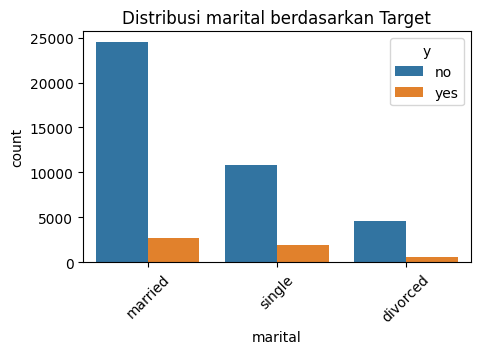

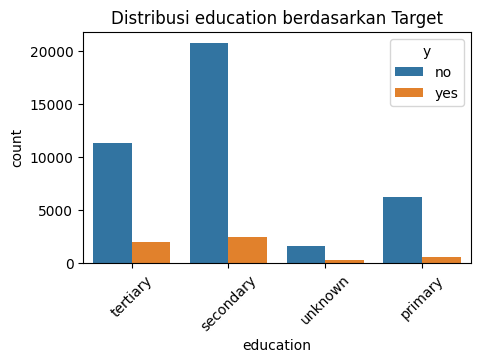

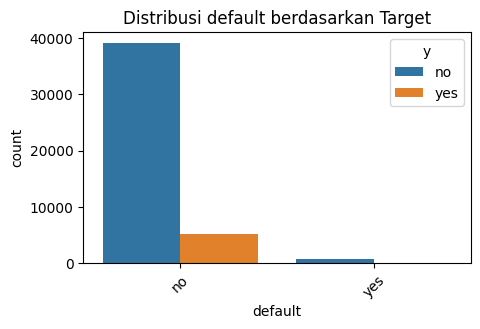

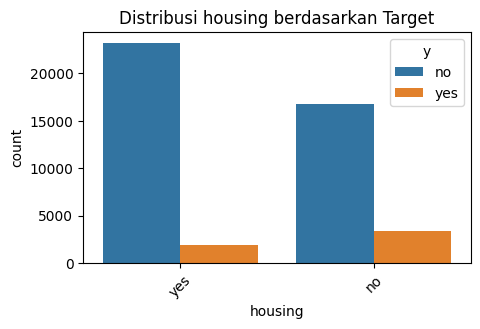

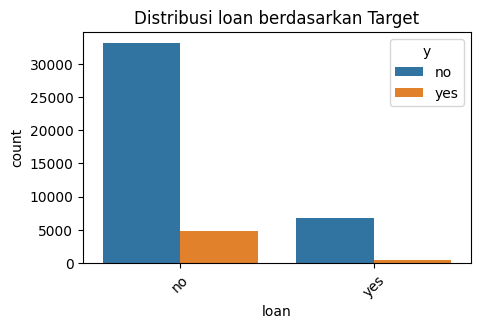

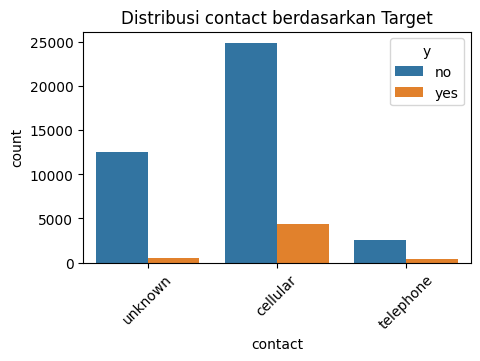

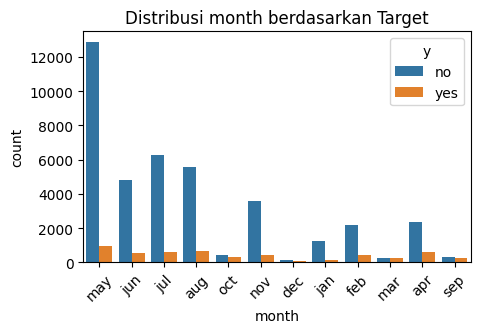

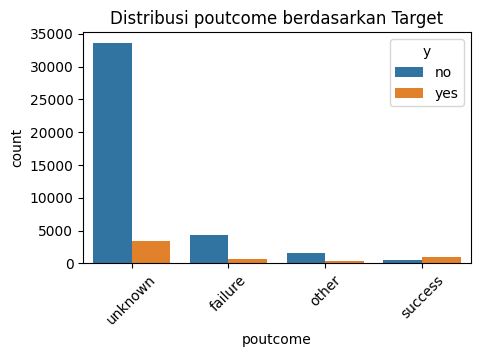

In [ ]:
# Plot hubungan fitur kategorikal terhadap target
categorical_cols = data.select_dtypes(exclude='number').columns.drop('y', errors='ignore')

for col in categorical_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, hue='y', data=data)
    plt.title(f'Distribusi {col} berdasarkan Target')
    plt.xticks(rotation=45)
    plt.show()

### Verify Data Quality

In [ ]:
from scipy import stats

# deteksi outlier dengan z-score
z_scores = stats.zscore(data[numeric_cols])
outliers = (abs(z_scores) > 3).sum(axis=0)
outliers_per_col = dict(zip(numeric_cols, outliers))

print("Jumlah outlier per kolom:")
print(outliers_per_col)


Jumlah outlier per kolom:
{'age': np.int64(381), 'balance': np.int64(745), 'day': np.int64(0), 'duration': np.int64(963), 'campaign': np.int64(840), 'pdays': np.int64(1723), 'previous': np.int64(582)}


nilainya menyimpang sangat jauh dari pola mayoritas data.

Menggunakan model yang tahan outlier (RF dan GBC)

# **Data Preparation**

### Format Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

# ENCODING (untuk kolom kategorikal)
le = LabelEncoder()
data['y'] = le.fit_transform(data['y'])  # yes=1, no=0
data['job'] = le.fit_transform(data['job'])
data['marital'] = le.fit_transform(data['marital'])
data['education'] = le.fit_transform(data['education'])
data['default'] = le.fit_transform(data['default'])
data['housing'] = le.fit_transform(data['housing'])
data['loan'] = le.fit_transform(data['loan'])
data['contact'] = le.fit_transform(data['contact'])
data['month'] = le.fit_transform(data['month'])
data['poutcome'] = le.fit_transform(data['poutcome'])

In [ ]:
data['y'].value_counts()

,count
y,
0,39922
1,5289


no = 0
yes = 1

In [ ]:
# Pisahkan fitur dan target
X = data.drop('y', axis=1)  # fitur
y = data['y']

In [ ]:
# Split data menjadi Train dan Test rasio 80:20

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Ukuran data training:", X_train.shape)
print("Ukuran data testing:", X_test.shape)
print("Distribusi kelas di training set:\n", y_train.value_counts(normalize=True))
print("Distribusi kelas di testing set:\n", y_test.value_counts(normalize=True))




Ukuran data training: (36168, 16)
Ukuran data testing: (9043, 16)
Distribusi kelas di training set:
 y
0    0.883018
1    0.116982
Name: proportion, dtype: float64
Distribusi kelas di testing set:
 y
0    0.883003
1    0.116997
Name: proportion, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Tujuannya: menyamakan skala antar fitur(fitur (kolom) punya rata-rata 0 dan standar deviasi 1.).
Hanya di data train, tidak boleh menghitung mean dan std dev dari test set, karena itu kebocoran data (data leakage).

In [ ]:
import numpy as np

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Statistik data training setelah standarisasi:")
print(X_train_scaled_df.describe().T[['mean', 'std']].round(2))
print("\nStatistik data testing setelah standarisasi:")
print(X_test_scaled_df.describe().T[['mean', 'std']].round(2))

Statistik data training setelah standarisasi:
           mean  std
age        -0.0  1.0
job        -0.0  1.0
marital    -0.0  1.0
education   0.0  1.0
default     0.0  1.0
balance    -0.0  1.0
housing     0.0  1.0
loan        0.0  1.0
contact    -0.0  1.0
day         0.0  1.0
month       0.0  1.0
duration   -0.0  1.0
campaign    0.0  1.0
pdays       0.0  1.0
previous   -0.0  1.0
poutcome    0.0  1.0

Statistik data testing setelah standarisasi:
           mean   std
age        0.02  1.00
job        0.01  1.00
marital    0.00  1.00
education  0.02  1.00
default    0.01  1.02
balance   -0.01  0.96
housing   -0.02  1.00
loan      -0.01  0.99
contact    0.01  1.00
day       -0.01  0.99
month      0.01  1.00
duration  -0.01  0.97
campaign  -0.00  0.99
pdays      0.00  1.00
previous  -0.00  0.76
poutcome  -0.01  1.01


# **Modelling**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

- KNN = karena metode ini menjadi baseline distance-based sederhana untuk melihat apakah kedekatan antar pelanggan (berdasarkan fitur terstandarisasi) cukup menjelaskan peluang konversi.

- SVM = karena mampu menangkap pola non-linear pada data tabular hasil encoding dan bekerja baik pada dataset dengan margin kelas kecil serta potensi imbalance.

- Random Forest = karena stabil, tidak butuh scaling, kuat untuk data tabular kategorikal–numerik, dan memberikan interpretasi lewat feature importance.

- Gradient Boosting = karena umumnya memberikan performa terbaik pada data tabular dengan menangkap interaksi fitur kompleks melalui boosting bertahap.

### Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state=42, probability=True)
svm.fit(X_train_scaled_df, y_train)

SVC(probability=True, random_state=42)

SVM bekerja dengan mencari garis pemisah terbaik antara dua kelas.
Ketika training, SVM memilih beberapa titik yang paling menentukan garis pemisah. Titik-titik ini disebut support vector. Hanya titik itu yang dipakai model untuk membuat batas keputusan.

Setelah selesai dilatih, model menggunakan batas tersebut untuk memprediksi kelas pada data testing.

In [ ]:
y_pred_svc = svm.predict(X_test_scaled_df)

In [ ]:
y_proba_svc = svm.predict_proba(X_test_scaled_df)[:, 1]

In [ ]:
hasil_prediksi_svc = pd.DataFrame({
    'y_true': y_test.values,
    'y_pred': svm.predict(X_test_scaled_df),
    'prob_yes': y_proba_svc
})

hasil_prediksi_svc.head(10)

,y_true,y_pred,prob_yes
0,0,0,0.066764
1,0,0,0.081320
2,0,0,0.085409
3,0,0,0.076146
4,0,0,0.075611
5,0,0,0.088260
6,0,0,0.061996
7,1,1,0.976215
8,0,0,0.071642
9,0,0,0.050260


In [ ]:
print(classification_report(y_test, svm.predict(X_test_scaled_df)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7985
           1       0.65      0.26      0.37      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.62      0.66      9043
weighted avg       0.88      0.90      0.88      9043



Hasil evaluasi menunjukkan bahwa SVM memiliki akurasi 90%, tetapi angka ini menyesatkan karena dataset tidak seimbang.
Untuk kelas 0, model bekerja sangat baik dengan recall 98%. Artinya model hampir selalu benar dalam mengenali nasabah yang menolak tawaran.

Namun untuk kelas 1, yaitu nasabah yang menerima tawaran, performanya jauh lebih rendah. Recall-nya hanya 26%, sehingga sebagian besar nasabah yang sebenarnya tertarik justru tidak terdeteksi oleh model.

Model gagal mengenali calon nasabah yang sebenarnya tertarik (kelas 1).

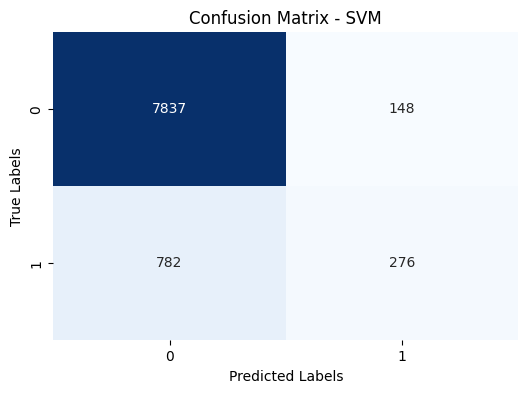

In [ ]:
# confussion matriks

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_svc = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

- True Negative (TN) = 7837 - Model prediksi "tidak" (0), aktualnya memang "tidak" (0) → BENAR
- False Positive (FP) = 148 - Model prediksi "ya" (1), tapi aktualnya "tidak" (0) → SALAH (Type I error)
- False Negative (FN) = 782 - Model prediksi "tidak" (0), tapi aktualnya "ya" (1) → SALAH (Type II error)
- True Positive (TP) = 276 - Model prediksi "ya" (1), aktualnya memang "ya" (1) → BENAR

### K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled_df, y_train)

KNeighborsClassifier()

KNN bekerja dengan mencari k tetangga terdekat dari setiap sampel baru berdasarkan jarak ke data training, lalu menentukan kelasnya melalui voting mayoritas dari tetangga-tetangga tersebut.

In [ ]:
y_pred_knn = knn.predict(X_test_scaled_df)

In [ ]:
y_proba_knn = knn.predict_proba(X_test_scaled_df)[:, 1]

In [ ]:
hasil_prediksi_knn = pd.DataFrame({
    'y_true': y_test.values,
    'y_pred': knn.predict(X_test_scaled_df),
    'prob_yes': y_proba_knn
})

hasil_prediksi_knn.head(10)

,y_true,y_pred,prob_yes
0,0,0,0.0
1,0,0,0.0
2,0,0,0.0
3,0,0,0.0
4,0,0,0.0
5,0,0,0.0
6,0,0,0.0
7,1,1,1.0
8,0,0,0.0
9,0,0,0.0


In [ ]:
print(classification_report(y_test, knn.predict(X_test_scaled_df)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7985
           1       0.57      0.32      0.41      1058

    accuracy                           0.89      9043
   macro avg       0.74      0.64      0.67      9043
weighted avg       0.87      0.89      0.88      9043



Model KNN dengan k=5 menghasilkan akurasi 89%,performanya sangat tinggi karena kelas ini memang mayoritas. Namun untuk kelas positif, yaitu nasabah yang benar-benar menerima tawaran deposit, recall model hanya 32%. Artinya sebagian besar nasabah yang tertarik tetap tidak tertangkap oleh model.

Ini terjadi karena KNN sangat bergantung pada tetangga terdekat, sehingga ketika mayoritas data adalah kelas 0, prediksi KNN juga cenderung mengikuti mayoritas.

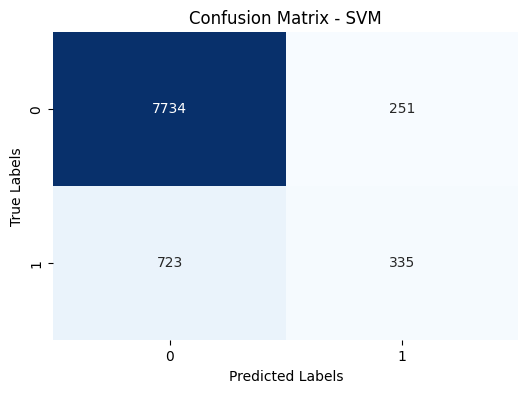

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Random Forest Classifier

In [ ]:
# Model random forest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_scaled_df, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

- Random Forest bekerja dengan membangun banyak pohon keputusan sekaligus.
- Setiap pohon memberikan voting apakah sampel termasuk kelas 0 atau kelas 1

- Random Forest kemudian mengambil suara mayoritas dari seluruh pohon.


In [ ]:
# Prediksi pada data test
y_pred_rf = rf.predict(X_test_scaled_df)

# Prediksi probabilitas
y_proba = rf.predict_proba(X_test_scaled_df)[:, 1]


In [ ]:
import pandas as pd

hasil_prediksi = pd.DataFrame({
    'y_true': y_test.values,
    'y_pred': rf.predict(X_test_scaled_df),
    'prob_yes': y_proba
})

hasil_prediksi.head(10)


,y_true,y_pred,prob_yes
0,0,0,0.00
1,0,0,0.00
2,0,0,0.01
3,0,0,0.00
4,0,0,0.00
5,0,0,0.06
6,0,0,0.00
7,1,1,0.83
8,0,0,0.03
9,0,0,0.02


In [ ]:
print(classification_report(y_test, rf.predict(X_test_scaled_df)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.66      0.42      0.51      1058

    accuracy                           0.91      9043
   macro avg       0.79      0.70      0.73      9043
weighted avg       0.90      0.91      0.90      9043



- Precision 0.66 → dari prediksi positif, hanya 66% yang benar-benar 1.

- Recall 0.42 → ini lemah; model hanya bisa menangkap 42% kasus 1 dari total 1058 yang ada.

- F1 0.51 → performa sedang–cenderung lemah untuk kelas minoritas.

Jika dibandingkan dengan SVM dan KNN, Random Forest memberikan performa terbaik untuk kelas positif, dengan recall dan F1-score tertinggi. Artinya, model ini paling mampu mendeteksi pelanggan yang benar-benar menerima deposit, meskipun performanya masih belum ideal

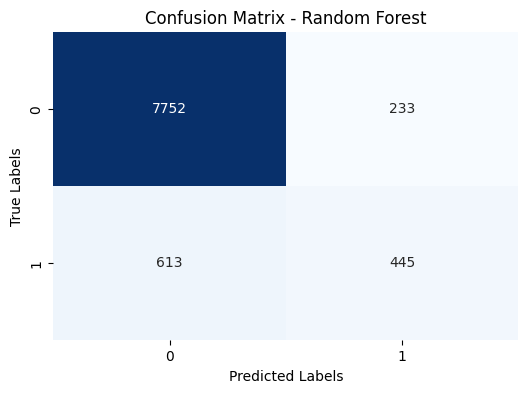

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

- True Negative (TN) = 7752 - Model prediksi "tidak" (0), aktualnya memang "tidak" (0) → BENAR
- False Positive (FP) = 233 - Model prediksi "ya" (1), tapi aktualnya "tidak" (0) → SALAH (Type I error)
- False Negative (FN) = 613 - Model prediksi "tidak" (0), tapi aktualnya "ya" (1) → SALAH (Type II error)
- True Positive (TP) = 445 - Model prediksi "ya" (1), aktualnya memang "ya" (1) → BENAR

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gbc.fit(X_train_scaled_df, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

Gradient Boosting bekerja dengan membangun model secara bertahap. Model pertama membuat prediksi kasar, lalu model kedua fokus memperbaiki kesalahan model pertama, model ketiga memperbaiki sisa kesalahannya lagi, dan begitu seterusnya sampai 200 kali (sesuai n_estimators). Setiap pohon kecil hanya punya kedalaman 3 (max_depth=3), supaya tiap pohon belajar pola sederhana. Learning rate 0.1 mengontrol seberapa besar koreksi yang dilakukan tiap pohon. Hasil akhirnya adalah model gabungan dari banyak pohon kecil yang bersama-sama menghasilkan prediksi yang lebih akurat, terutama untuk kelas minoritas.

In [ ]:
# Prediksi pada data test
y_pred_gbc = gbc.predict(X_test_scaled_df)

# Prediksi probabilitas
y_proba_gbc = gbc.predict_proba(X_test_scaled_df)[:, 1]

In [ ]:
hasil_prediksi_gbc = pd.DataFrame({
    'y_true': y_test.values,
    'y_pred': gbc.predict(X_test_scaled_df),
    'prob_yes': y_proba_gbc
})

hasil_prediksi_gbc.head(10)

,y_true,y_pred,prob_yes
0,0,0,0.007802
1,0,0,0.009150
2,0,0,0.009697
3,0,0,0.004995
4,0,0,0.008591
5,0,0,0.084836
6,0,0,0.005199
7,1,1,0.879845
8,0,0,0.005916
9,0,0,0.015847


In [ ]:
print(classification_report(y_test, gbc.predict(X_test_scaled_df)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.66      0.43      0.52      1058

    accuracy                           0.91      9043
   macro avg       0.79      0.70      0.73      9043
weighted avg       0.90      0.91      0.90      9043



Dibandingkan ketiga model lain, Gradient Boosting Classifier memberikan performa terbaik untuk kelas positif, dengan F1-score dan recall tertinggi. Artinya, GBC paling efektif dalam mengidentifikasi pelanggan yang benar-benar menerima deposit,

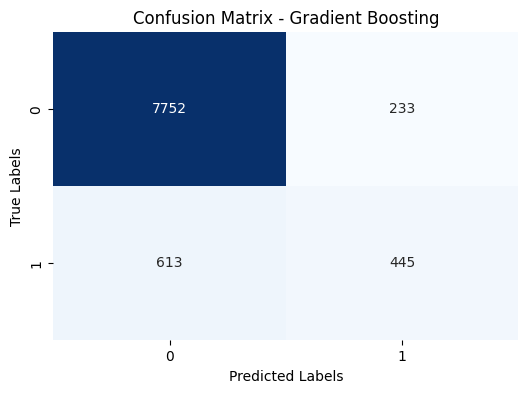

In [ ]:
cm_gbc = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_gbc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# **Evaluation**

### Classication Report (Accuracy, Precision, Recall & F1 Score)

In [ ]:
models = {
    "SVC": svm,
    "KNN": knn,
    "Random Forest": rf,
    "Gradient Boosting": gbc
}

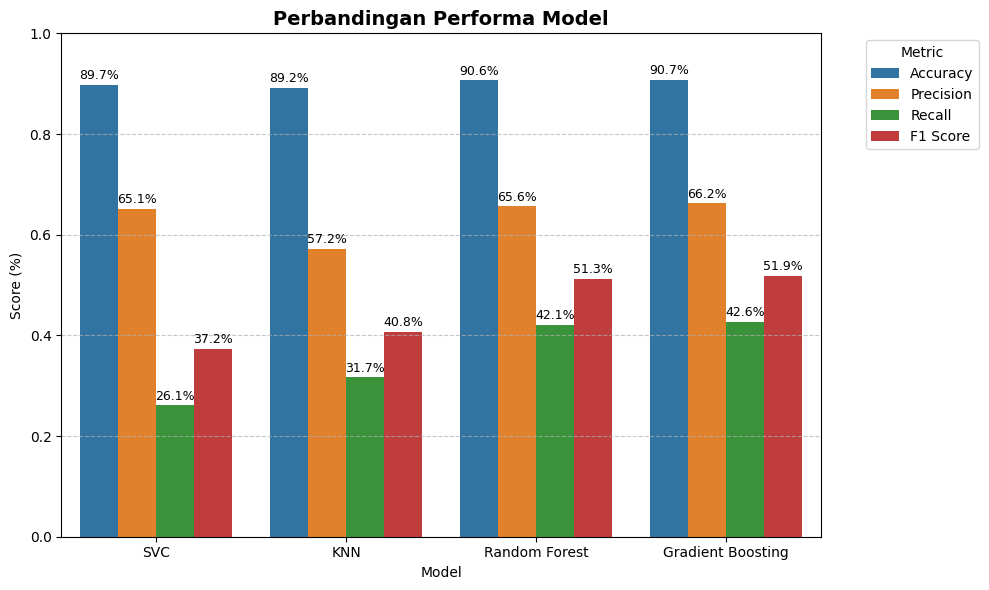

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []
for name, model in models.items():
    y_pred = model.predict(X_test_scaled_df)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })


df_metrics = pd.DataFrame(results)
df_metrics_melted = df_metrics.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="Score", hue="Metric", data=df_metrics_melted)

plt.title("Perbandingan Performa Model", fontsize=14, fontweight='bold')
plt.ylabel("Score (%)")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan label nilai dengan simbol %
for container in ax.containers:
    # ambil nilai tiap batang → kalikan 100 → tampilkan dengan simbol %
    labels = [f"{v.get_height() * 100:.1f}%" for v in container]
    ax.bar_label(container, labels=labels, label_type='edge', padding=2, fontsize=9)

plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Confussion Matrix

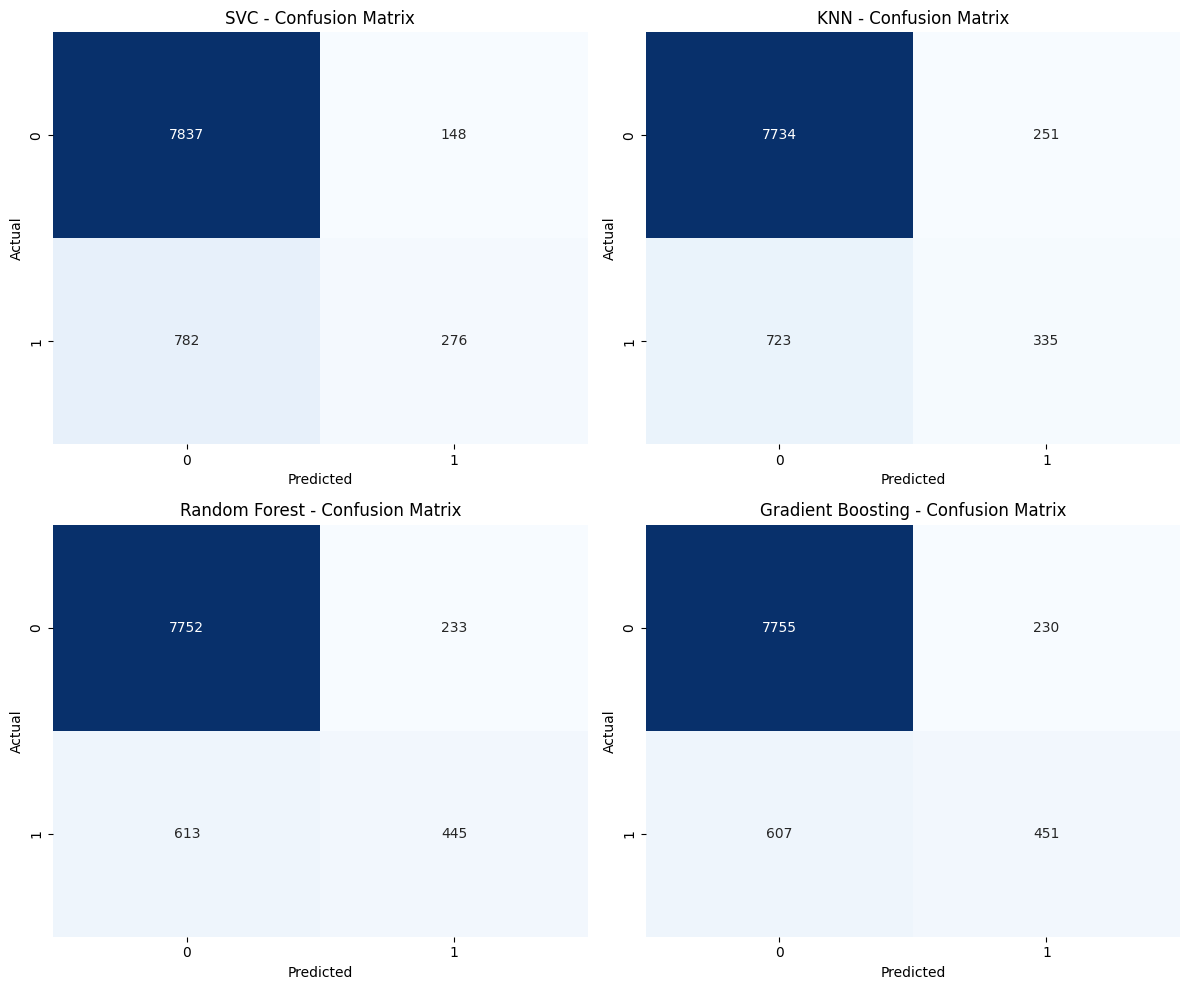

In [ ]:
plt.figure(figsize=(12, 10))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    y_pred = model.predict(X_test_scaled_df)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

### ROC-AUC Curve

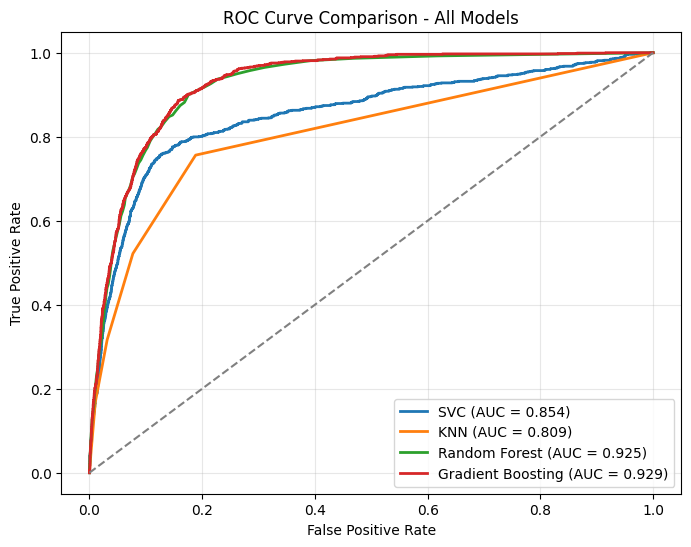

In [ ]:
# ROC (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Beberapa model (seperti SVM) tidak punya predict_proba tapi punya decision_function
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_scaled_df)[:, 1]
    else:
        y_score = model.decision_function(X_test_scaled_df)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

plt.title("ROC Curve Comparison - All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

ROC AUC adalah metrik untuk mengukur seberapa baik model membedakan kelas 0 dan kelas 1. Berdasarkan ROC AUC, model Gradient Boosting dan Random Forest menunjukkan kemampuan terbaik dalam membedakan kelas 0 dan 1. Nilainya di atas 0.92, yang berarti model sangat kuat. SVM cukup baik dengan 0.85, sementara KNN paling rendah dengan 0.80.

### Feature Importance

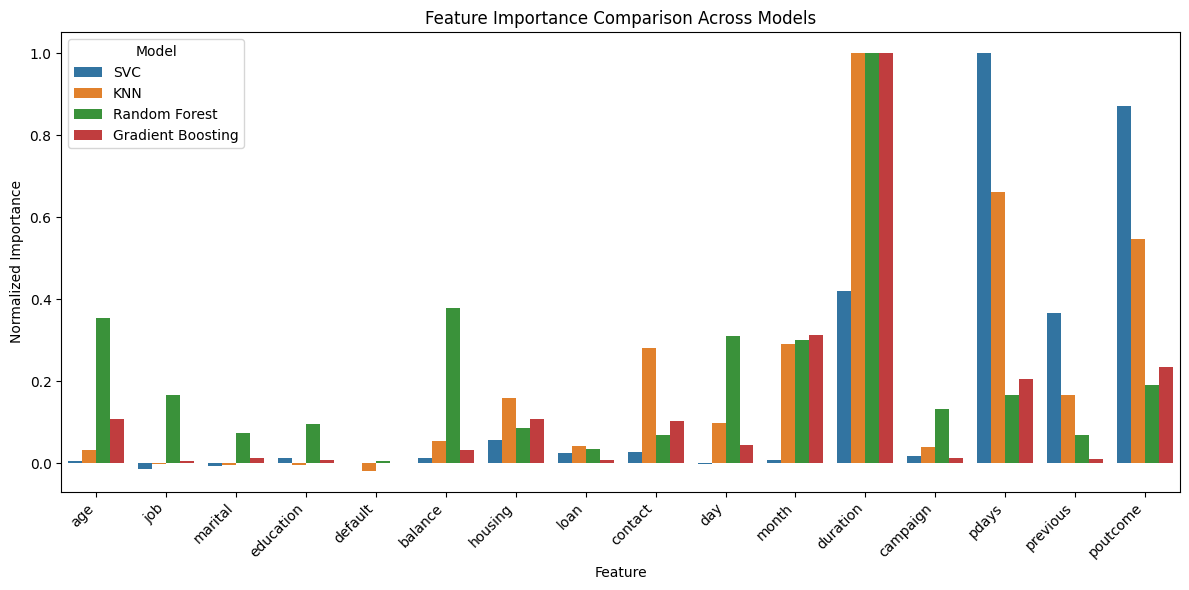

In [ ]:
from sklearn.inspection import permutation_importance
feature_names = X_test_scaled_df.columns

importance_dict = {}

for name, model in models.items():
    # Random Forest & Gradient Boosting
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_

    # Linear SVM
    elif hasattr(model, "coef_"):
        importance = np.abs(model.coef_)[0]

    # KNN atau model lain tanpa importance langsung
    else:
        result = permutation_importance(model, X_test_scaled_df, y_test, n_repeats=10, random_state=42)
        importance = result.importances_mean

    # Normalisasi (0–1)
    importance_dict[name] = importance / np.max(importance)

# Gabungkan jadi DataFrame
df_importance = pd.DataFrame(importance_dict, index=feature_names)
df_importance = df_importance.reset_index().melt(id_vars="index", var_name="Model", value_name="Importance")
df_importance.rename(columns={"index": "Feature"}, inplace=True)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(data=df_importance, x="Feature", y="Importance", hue="Model")
plt.title("Feature Importance Comparison Across Models")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Normalized Importance")
plt.tight_layout()
plt.show()

In [ ]:
# RF
feat_importance_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

print(feat_importance_rf.head())


     feature  importance
11  duration    0.291153
5    balance    0.110084
0        age    0.103281
9        day    0.090262
10     month    0.087403


In [ ]:
# GBC
feat_importance_gbc = pd.DataFrame({
    'feature': X.columns,
    'importance': gbc.feature_importances_
}).sort_values(by='importance', ascending=False)

print(feat_importance_gbc.head())

     feature  importance
11  duration    0.452893
10     month    0.142222
15  poutcome    0.106945
13     pdays    0.092902
6    housing    0.048854


### Error Rate

               Model  Error Rate
0                SVC    0.102842
1                KNN    0.107708
2      Random Forest    0.093553
3  Gradient Boosting    0.092558


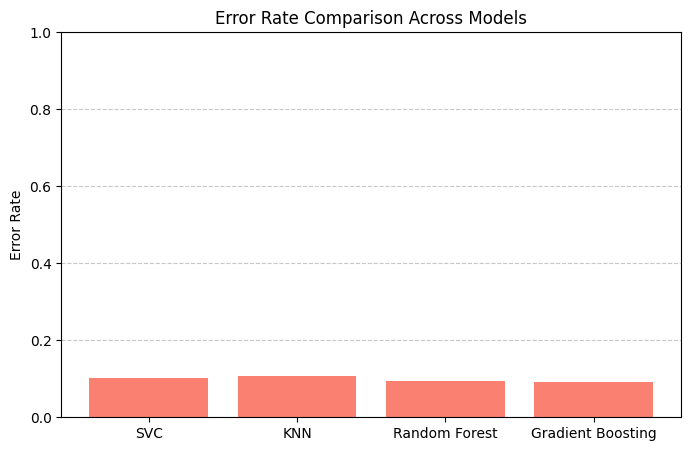

In [ ]:


# Hitung error rate
error_rates = {}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled_df)
    acc = accuracy_score(y_test, y_pred)
    error_rates[name] = 1 - acc

# Konversi ke DataFrame
df_error = pd.DataFrame(list(error_rates.items()), columns=["Model", "Error Rate"])

# Tampilkan tabel
print(df_error)

# Visualisasi
plt.figure(figsize=(8,5))
plt.bar(df_error["Model"], df_error["Error Rate"], color="salmon")
plt.title("Error Rate Comparison Across Models")
plt.ylabel("Error Rate")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/tmp/ipython-input-1625025196.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_error, x="Error Rate", y="Model", palette="RdYlGn_r")


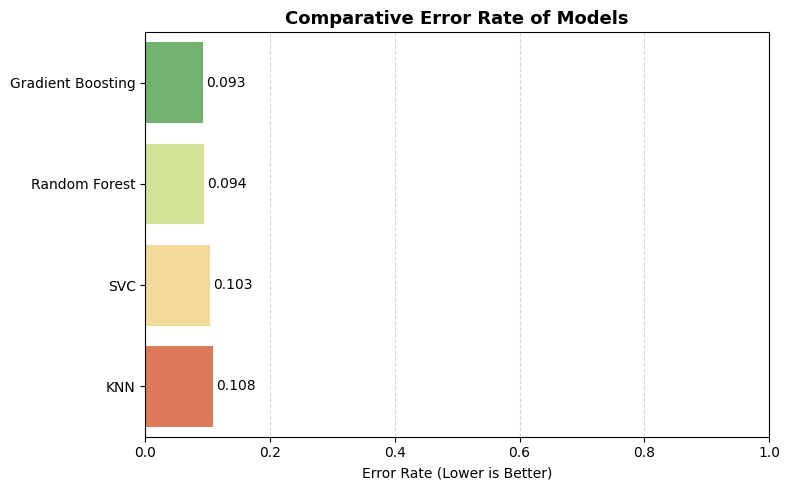

In [ ]:
# Hitung error rate

error_rates = {name: 1 - accuracy_score(y_test, model.predict(X_test_scaled_df)) for name, model in models.items()}

df_error = pd.DataFrame(list(error_rates.items()), columns=["Model", "Error Rate"])
df_error = df_error.sort_values("Error Rate", ascending=True)

# Visualisasi
plt.figure(figsize=(8,5))
sns.barplot(data=df_error, x="Error Rate", y="Model", palette="RdYlGn_r")

# Anotasi nilai
for i, (err, model) in enumerate(zip(df_error["Error Rate"], df_error["Model"])):
    plt.text(err + 0.005, i, f"{err:.3f}", va='center')

plt.title("Comparative Error Rate of Models", fontsize=13, fontweight='bold')
plt.xlabel("Error Rate (Lower is Better)")
plt.ylabel("")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# **Deployment**

In [ ]:
import joblib
# Menyimpan model SVM ke file
joblib.dump(svm, "svm_model.pkl")

['svm_model.pkl']

In [ ]:
# Menyimpan model RF ke file
joblib.dump(rf, "rf_model.pkl")

['rf_model.pkl']

In [ ]:
# Menyimpan model GBC ke file
joblib.dump(gbc, "gbc_model.pkl")

['gbc_model.pkl']

In [ ]:
# Menyimpan model KNN ke file
joblib.dump(knn, "knn_model.pkl")

['knn_model.pkl']

Hugging Face itu platform dan komunitas AI untuk model-model machine learning. library UI nya menggunakan gradio

Workflow Prediksi
Ketika user klik 'Predict', sistem melakukan:

- Mengambil input dari form
- Melakukan preprocessing dengan scaler dan encoder yang sama seperti saat training
- Menjalankan model yang dipilih user
- Menampilkan hasil prediksi + probabilitas